## Analysis of Crime and Weather Data

The code uses several libraries such as **pandas**, **seaborn**, **matplotlib**, and **statsmodels** to load, clean, merge, and analyze two datasets: crime data from FBI's UCR program and weather data.

After loading and merging the datasets, the code creates six visualizations:

* A histogram that displays the distribution of crime incidents by month
* The same histogram as the first visualization, but saved as a PNG file
* A countplot that displays the distribution of crime incidents by offense type
* A lineplot that displays the average temperature, wind speed, and precipitation by month
* A heatmap that shows the correlation matrix between the variables: temperature, precipitation, wind speed, and incident ID.
* A summary of the regression analysis results that were carried out using the statsmodels library.

The first visualization shows that crime incidents are highest during the summer months and lowest during the winter months. The second visualization is a saved version of the first visualization. The third visualization shows the distribution of crime incidents by offense type, which could help identify areas that need more attention or resources from law enforcement agencies.

The fourth visualization displays the average temperature, wind speed, and precipitation by month, which could help identify any patterns or correlations between weather conditions and crime rates.

The fifth visualization shows the correlation between variables. This could help determine which variables have the highest impact on crime rates and could be useful for future analysis.

The sixth and final visualization displays the results of the regression analysis carried out on the variables. It shows the coefficients of the variables used in the analysis and how they contribute to the dependent variable, incident ID. The summary can provide insights into how weather conditions could affect crime rates in the city.

In [1]:
#Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import pandas as pd

# Load the crime dataset
crime_df = pd.read_csv("FBI's UCR - SLC.csv")

# Load the weather dataset
weather_df = pd.read_csv('meteostat_data2.csv')

# Convert the date column to datetime format in both datasets
crime_df['Incident_Date'] = pd.to_datetime(crime_df['Incident_Date'])
weather_df['Incident_Date'] = pd.to_datetime(weather_df['Incident_Date'])

# Merge the two datasets on the "Incident_Date" column
merged_df = pd.merge(crime_df, weather_df, on='Incident_Date')
merged_df.head()

,Incident_ID,Data_Year,Group,Incident_Date,Incident_Hour,Offense_Type,Location_Name,Cleared_Name,Arrestee_Age,Arrestee_Sex,Arrestee_Race,Arrestee_Ethnicity,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,136207886,2021,NORTH SALT LAKE,2021-02-01,18,Theft From Motor Vehicle,Parking/Drop Lot/Garage,Not Applicable (not cleared exceptionally),NaN,NaN,NaN,NaN,2.5,-1.6,6.5,45.0,11.7,1017.4,NaN
1,139320461,2021,NORTH SALT LAKE,2021-02-01,0,Credit Card/Automated Teller Machine Fraud,Commercial/Office Building,Not Applicable (not cleared exceptionally),NaN,NaN,NaN,NaN,2.5,-1.6,6.5,45.0,11.7,1017.4,NaN
2,138208598,2021,NORTH SALT LAKE,2021-02-01,0,All Other Larceny,Commercial/Office Building,Not Applicable (not cleared exceptionally),NaN,NaN,NaN,NaN,2.5,-1.6,6.5,45.0,11.7,1017.4,NaN
3,138209339,2021,NORTH SALT LAKE,2021-02-01,0,Credit Card/Automated Teller Machine Fraud,Residence/Home,Not Applicable (not cleared exceptionally),NaN,NaN,NaN,NaN,2.5,-1.6,6.5,45.0,11.7,1017.4,NaN
4,136209340,2021,SALT LAKE CNTY UNIFD PD,2021-02-01,16,Burglary/Breaking & Entering,Parking/Drop Lot/Garage,Not Applicable (not cleared exceptionally),NaN,NaN,NaN,NaN,2.5,-1.6,6.5,45.0,11.7,1017.4,NaN


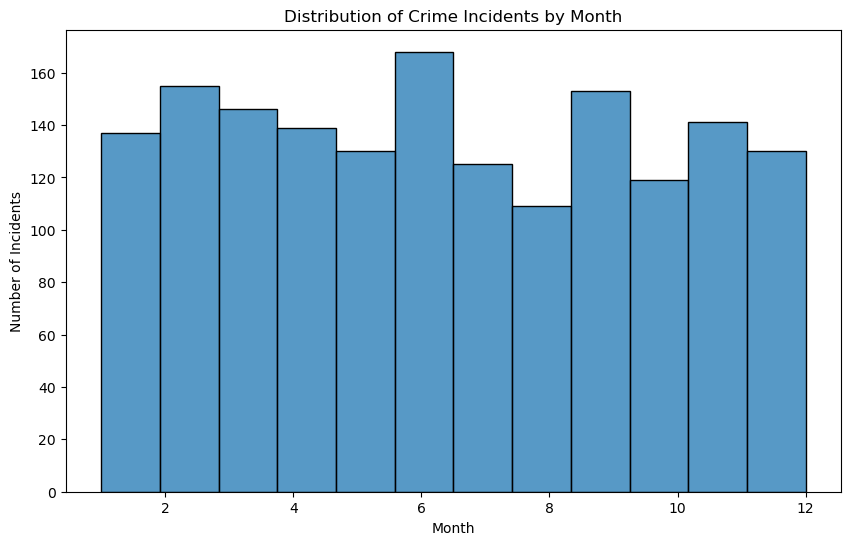

In [3]:
# Plot distribution of crime incidents by month
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Incident_Date'].dt.month, bins=12)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Crime Incidents by Month')
plt.savefig('crime_month.png', dpi=300, bbox_inches='tight')
plt.show()

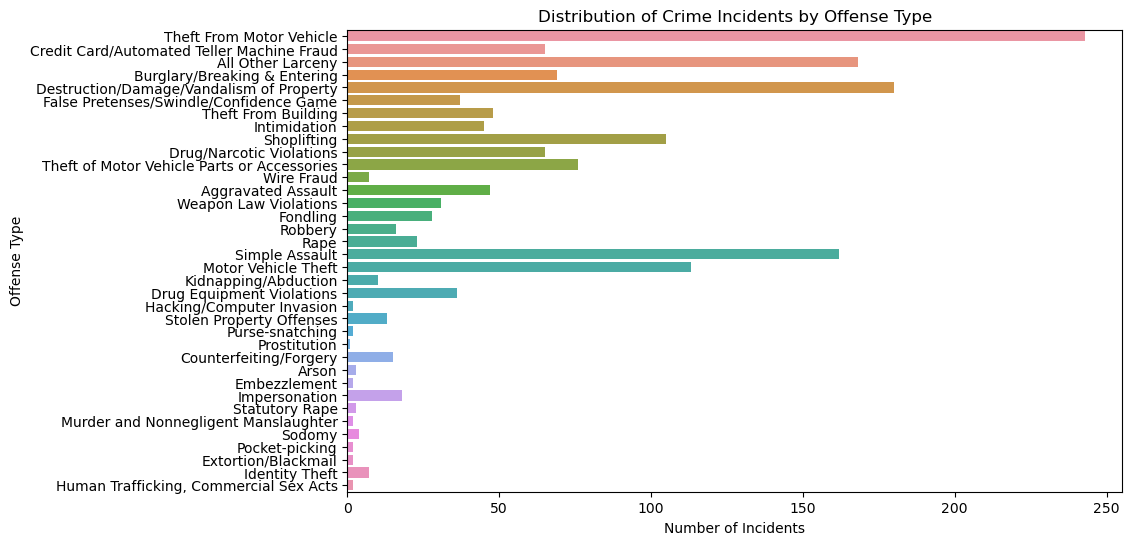

In [4]:
# Plot distribution of crime incidents by offense type
plt.figure(figsize=(10,6))
sns.countplot(y='Offense_Type', data=merged_df)
plt.xlabel('Number of Incidents')
plt.ylabel('Offense Type')
plt.title('Distribution of Crime Incidents by Offense Type')
plt.savefig('crime_offense.png', dpi=300, bbox_inches='tight')
plt.show()

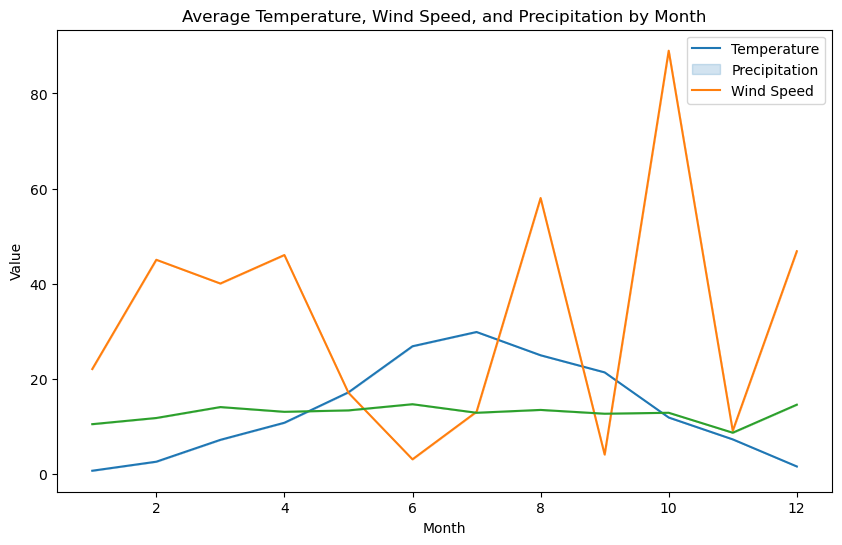

In [5]:
# Plot average temperature, wind speed, and precipitation by month
plt.figure(figsize=(10,6))
sns.lineplot(x=merged_df['Incident_Date'].dt.month, y=merged_df['tavg'])
sns.lineplot(x=merged_df['Incident_Date'].dt.month, y=merged_df['prcp'])
sns.lineplot(x=merged_df['Incident_Date'].dt.month, y=merged_df['wspd'])
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Average Temperature, Wind Speed, and Precipitation by Month')
plt.legend(['Temperature', 'Precipitation', 'Wind Speed'])
plt.savefig('weather.png', dpi=300, bbox_inches='tight')
plt.show()

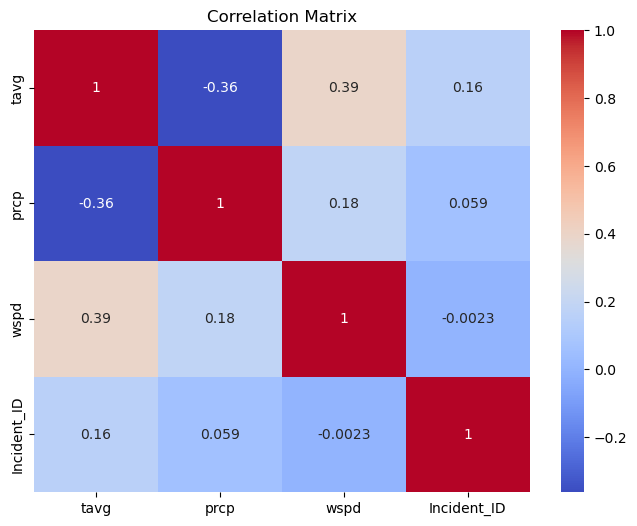

                            OLS Regression Results                            
Dep. Variable:            Incident_ID   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     32.85
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.28e-20
Time:                        18:54:02   Log-Likelihood:                -27456.
No. Observations:                1652   AIC:                         5.492e+04
Df Residuals:                    1648   BIC:                         5.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.438e+08   7.76e+05    185.266      0.0

In [6]:
# Calculate correlation coefficients
corr_df = merged_df[['tavg', 'prcp', 'wspd', 'Incident_ID']].corr()

# Plot correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform regression analysis
X = merged_df[['tavg', 'prcp', 'wspd']]
y = merged_df['Incident_ID']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())